In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# PASTIS

In [ ]:
# B2: Blue B3: Green B4: Red 
# B5 B6 B7 B8 B11 B12 B13

In [2]:
def load_data():
    n = os.listdir('/workspace/PASTIS/DATA_S2/')
    np.random.shuffle(n)
    n = n[0][3:-4]

    # Images
    data_s2 = np.load(f'/workspace/PASTIS/DATA_S2/S2_{n}.npy')
    # Annotations
    annotations_parcel = np.load(f'/workspace/PASTIS/ANNOTATIONS/ParcelIDs_{n}.npy')
    annotations_target = np.load(f'/workspace/PASTIS/ANNOTATIONS/TARGET_{n}.npy')
    # Instance Annotations
    instance_annotations_heatmap = np.load(f'/workspace/PASTIS/INSTANCE_ANNOTATIONS/HEATMAP_{n}.npy')
    instance_annotations_instances = np.load(f'/workspace/PASTIS/INSTANCE_ANNOTATIONS/INSTANCES_{n}.npy')
    instance_annotations_zones = np.load(f'/workspace/PASTIS/INSTANCE_ANNOTATIONS/ZONES_{n}.npy')

    # RGB Bands
    blue_band = data_s2[0,0,:,:] / 255.
    green_band = data_s2[0,1,:,:] / 255.
    red_band = data_s2[0,2,:,:] / 255.

    rgb_image = np.dstack([red_band, green_band, blue_band])


    return data_s2, annotations_parcel, annotations_target, instance_annotations_heatmap, instance_annotations_instances, instance_annotations_zones, rgb_image


In [3]:
def get_rgb(x, batch_index=0, t_show=1):
    """Utility function to get a displayable rgb image 
    from a Sentinel-2 time series.
    """
    im = x[t_show, [2,1,0]]
    mx = im.max(axis=(1,2))
    mi = im.min(axis=(1,2))   
    im = (im - mi[:,None,None])/(mx - mi)[:,None,None]
    im = im.swapaxes(0,2).swapaxes(0,1)
    im = np.clip(im, a_max=1, a_min=0)
    return im

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


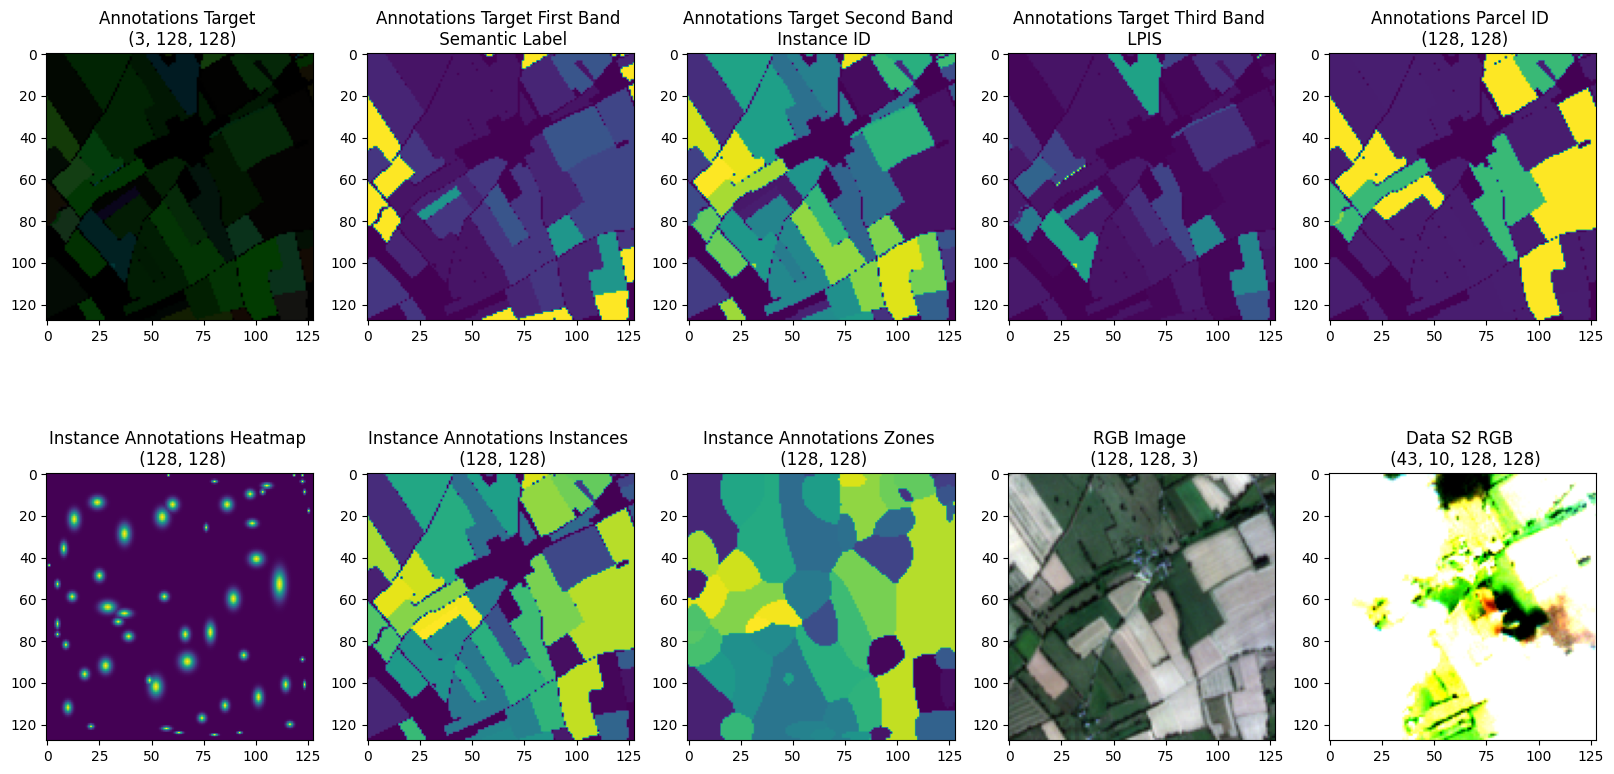

In [4]:
data_s2, annotations_parcel, annotations_target, instance_annotations_heatmap, instance_annotations_instances, instance_annotations_zones, rgb_image = load_data()


fix, axes = plt.subplots(2,5, figsize=(20,10))

axes[0][0].imshow(annotations_target.transpose(1,2,0), cmap='prism')
axes[0][1].imshow(annotations_target[0])
axes[0][2].imshow(annotations_target[1])
axes[0][3].imshow(annotations_target[2])

axes[0][4].imshow(annotations_parcel)

axes[1][0].imshow(instance_annotations_heatmap)
axes[1][1].imshow(instance_annotations_instances)
axes[1][2].imshow(instance_annotations_zones)

axes[1][3].imshow(get_rgb(data_s2))
axes[1][4].imshow(rgb_image)


axes[0][0].set_title(f'Annotations Target \n {annotations_target.shape}')
axes[0][1].set_title('Annotations Target First Band \n Semantic Label')
axes[0][2].set_title('Annotations Target Second Band \n Instance ID')
axes[0][3].set_title('Annotations Target Third Band \n LPIS')

axes[0][4].set_title(f'Annotations Parcel ID \n {annotations_parcel.shape}')

axes[1][0].set_title(f'Instance Annotations Heatmap \n {instance_annotations_heatmap.shape}')
axes[1][1].set_title(f'Instance Annotations Instances \n {instance_annotations_instances.shape}')
axes[1][2].set_title(f'Instance Annotations Zones \n {instance_annotations_zones.shape}')

axes[1][3].set_title(f'RGB Image \n {get_rgb(data_s2).shape}')
axes[1][4].set_title(f'Data S2 RGB \n {data_s2.shape}')


plt.show()

In [5]:
data_s2.shape

(43, 10, 128, 128)